<a href="https://colab.research.google.com/github/carlos-jaramillo/sales_forecast/blob/main/sales_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desarrollado por: *Martín Jaramillo*

* Fecha de creación: 18/02/2023
* Fecha de actualización: 10/03/2023

### Descripción.
* sales_forecast actualización 4

### IMPORTANTE:
Lamentablemente no tengo respaldos de cada parte del proyecto ya que lo he ido actualizando conforme pasó el tiempo así que por esta vez, que se hizo tarde el subir la correción de la tarea, por desconocimiento, corregiré lo que cada tarea me decía en el mismo documento y subiré la misma tarea a cada corrección.

In [1]:
import matplotlib.pyplot as plt


In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import pandas as pd
filename="/content/drive/MyDrive/sales_predictions.csv"
df=pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#cuantas filas y columnas hay
df.shape

(8523, 12)

In [6]:
#tipos de datos en cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Verificación de duplicados
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
#Verificación datos faltantes
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [11]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [13]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
#Método interpolate() para llenar valores NA en la columna "Item_Weight"
df["Item_Weight"].interpolate(method ='linear', limit_direction ='forward', inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
#Método "ffill" para rellenar datos en columna "Outlet_Size"
df['Outlet_Size'] = df['Outlet_Size'].fillna(method='ffill')


In [16]:
#grouped = df.groupby(["Outlet_Type", "Outlet_Location_Type"])


In [17]:
#df["Outlet_Size"] = grouped["Outlet_Size"].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [18]:
#df["Outlet_Size"].fillna("Unknown", inplace=True)

In [19]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
  df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
#Arreglando datos categóricos inconsistentes.
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace('LF', "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace('low fat', "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace('reg', "Regular")

In [22]:
#Obteniendo min, max, y media de diversas columnas numéricas
print("El mínimo es",df["Item_Weight"].min())
print("El máximo es",df["Item_Weight"].max()) 
print("La media es", df["Item_Weight"].mean())

El mínimo es 4.555
El máximo es 21.35
La media es 12.831222280887012


In [23]:
print("El mínimo es",df["Item_Visibility"].min())
print("El máximo es",df["Item_Visibility"].max()) 
print("La media es", df["Item_Visibility"].mean())

El mínimo es 0.0
El máximo es 0.328390948
La media es 0.06613202877895108


In [24]:
print("El mínimo es",df["Item_MRP"].min())
print("El máximo es",df["Item_MRP"].max()) 
print("La media es", df["Item_MRP"].mean())

El mínimo es 31.29
El máximo es 266.8884
La media es 140.9927819781767


In [25]:
print("El mínimo es",df["Outlet_Establishment_Year"].min())
print("El máximo es",df["Outlet_Establishment_Year"].max()) 
print("La media es", df["Outlet_Establishment_Year"].mean())

El mínimo es 1985
El máximo es 2009
La media es 1997.8318667135984


In [26]:
print("El mínimo es",df["Item_Outlet_Sales"].min())
print("El máximo es",df["Item_Outlet_Sales"].max()) 
print("La media es", df["Item_Outlet_Sales"].mean())

El mínimo es 33.29
El máximo es 13086.9648
La media es 2181.288913575032


In [27]:
#heatmap
corr = df.corr()

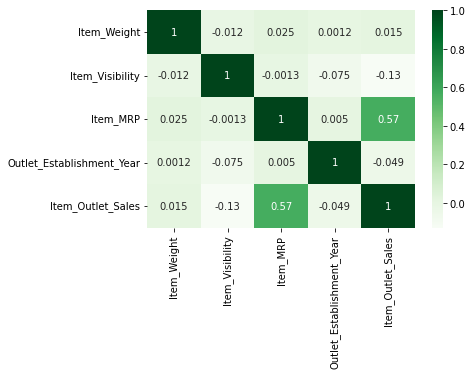

In [28]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

Relaciones entre variables vista en el heatmap:

De 1 a 0.7 se considera "fuerte".

Entre 0,5 y 0,7 se considera “moderado”.

Entre 0,3 y 0,5 se considera una correlación “baja”.

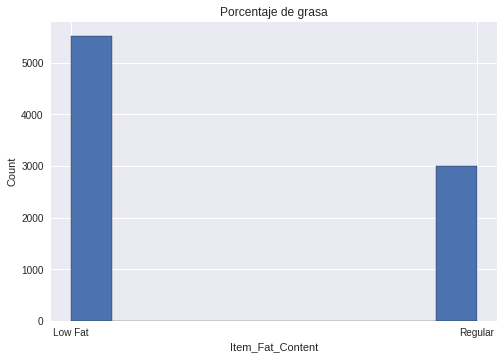

In [29]:
#Histograma de Item_Fat_Content
plt.style.use("seaborn")
plt.title("Porcentaje de grasa")
plt.xlabel("Item_Fat_Content")
plt.ylabel("Count")
df["Item_Fat_Content"].hist(edgecolor="black");

In [ ]:
#Análisis: Hay más productos "Low Fat", supongo que por el tema de que es mejor visto que lo regular en general.

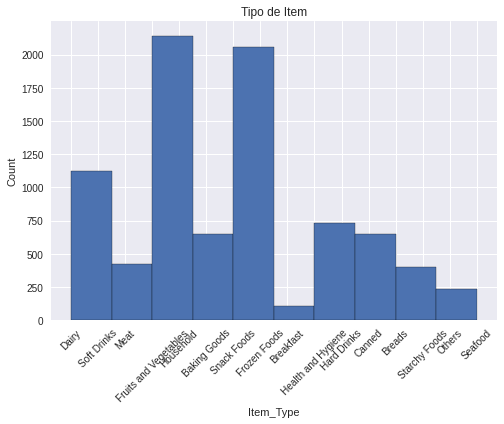

In [30]:
#Histograma de Item_Type
plt.style.use("seaborn")
plt.title("Tipo de Item")
plt.xlabel("Item_Type")
plt.ylabel("Count")

plt.xticks(rotation = 45)

df["Item_Type"].hist(edgecolor="black");

In [ ]:
#Análisis: Cantidad de tipos de alimentos vendidos

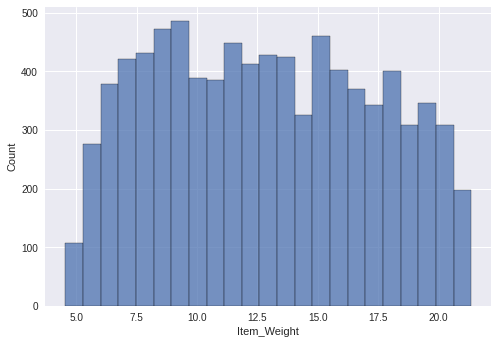

In [31]:
#Item_Weight
sns.histplot(df["Item_Weight"])
plt.show()

In [ ]:
#Análisis: Peso de cada item, para ver que tan pesados son, nada importante al análisis.

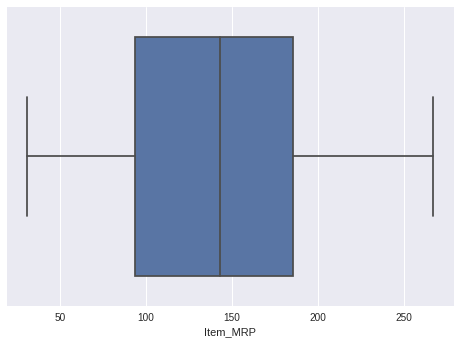

In [34]:
#Item_MRP
sns.boxplot(x=df["Item_MRP"])
plt.show()


In [ ]:
#Análisis: Hacer algo más visible donde se encuentra ubicado el valor de la media de la columna "Item_MRP"

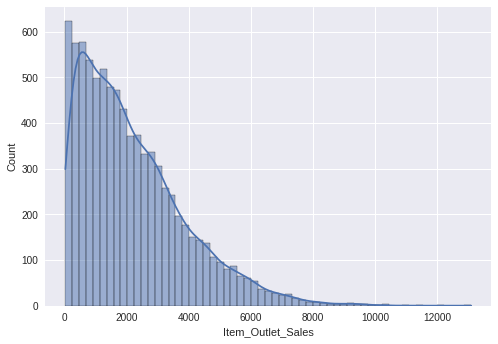

In [35]:
#Item_Outlet_Sales
sns.histplot(df["Item_Outlet_Sales"], kde=True)
plt.show()


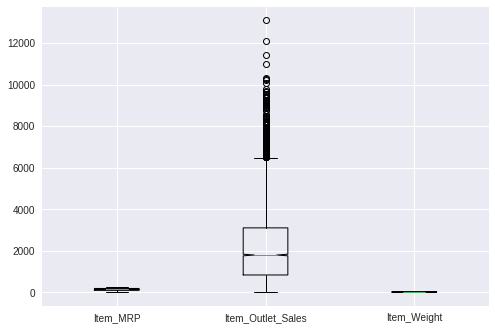

In [32]:
#boxplot diversity stadistics
MRP = df['Item_MRP']
ventas = df['Item_Outlet_Sales']
peso = df["Item_Weight"]

fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([MRP,ventas,peso], notch = True, labels=['Item_MRP', 'Item_Outlet_Sales', "Item_Weight"]);
plt.show()